In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('1')

1


In [83]:
#df = pd.read_excel('Z:\2022 이어드림 프로젝트\2022-05-09\파이널프로젝트_RAW_210329_210926.xlsx')

df = pd.read_excel('파이널프로젝트_RAW_210329_210926.xlsx')
df.shape

(105419, 18)

In [26]:
df.head()
# id : 각 거래내역에 대한 ID
# customer_id : 고객 ID
# course_id : 강의 고유값
# type : 결제 유무 - order / payment / 
# state : 결제 상태
# course_title : 강의 제목
# category_title : 강의 분류
# format : 올인원/스쿨온라인 _ 난이도 설정?
# completed_at : 처리 날짜
# transaction_amount : 결제 금액
# coupon_title : 쿠폰 이름
# coupon_discount_amount : 할인 비율
# sale_price : 할인 금액
# tax_free_amount : 면세

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. 
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

# method : 결제 방식 VBANK : 가상계좌?
# subcategory_title : 서브 분류
# marketing_start_at : 마케팅 시작 날짜 (강의를 판매한 시점)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [84]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


In [85]:
df.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04


In [86]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [87]:
df.isna().sum()/len(df)*100

id                         0.000000
customer_id                0.002846
course_id                  4.939337
type                       0.000000
state                      0.000000
course_title               0.015178
category_title             0.022766
format                     0.015178
completed_at               0.000000
transaction_amount         0.000000
coupon_title              69.818534
coupon_discount_amount    69.818534
sale_price                 1.070016
tax_free_amount            1.070016
pg                        14.300079
method                    12.422808
subcategory_title         18.809702
marketing_start_at        17.054800
dtype: float64

In [30]:
df.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [31]:
df.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [35]:
df.columns

# id : 각 거래내역에 대한 ID
# customer_id : 고객 ID
# course_id : 강의 고유값
# type : 결제 유무 - order / payment / 
# state : 결제 상태
# course_title : 강의 제목
# category_title : 강의 분류
# format : 올인원/스쿨온라인 _ 난이도 설정?
# completed_at : 처리 날짜
# transaction_amount : 결제 금액
# coupon_title : 쿠폰 이름
# coupon_discount_amount : 할인 비율
# sale_price : 할인 금액
# tax_free_amount : 면세

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. - TOSS payment?
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

# method : 결제 방식 VBANK : 가상계좌?
# subcategory_title : 서브 분류
# marketing_start_at : 마케팅 시작 날짜 (강의를 판매한 시점)

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [88]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [38]:
df['method'].nunique()

9

In [59]:
df[df['method'].isna()]['pg'].unique()

array([], dtype=object)

In [58]:
df['method']

In [67]:
(df['pg'] + df['method']).unique() #결제 방식 확인 

array([nan, 'INICISTRANS', 'INICISCARD', 'INICISVBANK', 'KAKAOCARD',
       'CHAITRANS', 'KAKAOPOINT', 'PAYCOCARD', 'PAYCOPOINT', 'PAYCOVBANK',
       'NAVERCARD', 'NAVERTRANS', 'NAVERPOINT', 'PAYCOTRANSFER'],
      dtype=object)

In [68]:
df['pg'].fillna('pg') #PG의 nan을 pg로 변경, 빈값을 default PG사로 채우기

0             pg
1             pg
2             pg
3             pg
4             pg
           ...  
105414    INICIS
105415    INICIS
105416    INICIS
105417    INICIS
105418     NAVER
Name: pg, Length: 105419, dtype: object

In [107]:
payment_data = df #결제 방식 확인 
payment_data['pg'] = df['pg'].fillna('PG')
payment_data['pg'].unique() #nan이 pg로 바꼈는지 확인

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [73]:
(payment_data['pg'] + ':' + payment_data['method']).unique() #nan은 합쳐도 인식이 안되는 듯

array(['PG:VBANK', 'PG:CARD', 'PG:TRANS', 'PG:PROMOTION', 'PG:TRANSFER',
       'PG:ONSITE', 'INICIS:TRANS', 'INICIS:CARD', 'INICIS:VBANK',
       'PG:B2B_CONTRACT', nan, 'KAKAO:CARD', 'CHAI:TRANS', 'KAKAO:POINT',
       'PAYCO:CARD', 'PAYCO:POINT', 'PAYCO:VBANK', 'NAVER:CARD',
       'NAVER:TRANS', 'PG:VOUCHER', 'NAVER:POINT', 'PAYCO:TRANSFER'],
      dtype=object)

In [89]:
df[df['method'].isna()]['pg'].unique()

array(['KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [108]:
payment_data['method'] = df['method'].fillna('')
payment_data['method'].unique() #method의 nan를 ''로 변환

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', '', 'POINT', 'VOUCHER'], dtype=object)

In [109]:
payment_data['payment_data'] = df['pg']+' '+payment_data['method']
payment_data['payment_data'].unique() #새로운 column payment_data 생성

array(['PG VBANK', 'PG CARD', 'PG TRANS', 'PG PROMOTION', 'PG TRANSFER',
       'PG ONSITE', 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK',
       'PG B2B_CONTRACT', 'KAKAO ', 'CHAI ', 'PAYCO ', 'NAVER ',
       'KAKAO CARD', 'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD',
       'PAYCO POINT', 'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS',
       'PG VOUCHER', 'NAVER POINT', 'PAYCO TRANSFER'], dtype=object)

In [110]:
payment_data.drop(['pg','method'],axis = 1, inplace = True)
payment_data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,개발자 커리어,NaT,PG VBANK
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,영상 편집,2020-12-02,PG CARD
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,2021-03-04,PG CARD
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,2021-03-04,PG CARD
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PPT/보고서,2019-11-14,PG CARD


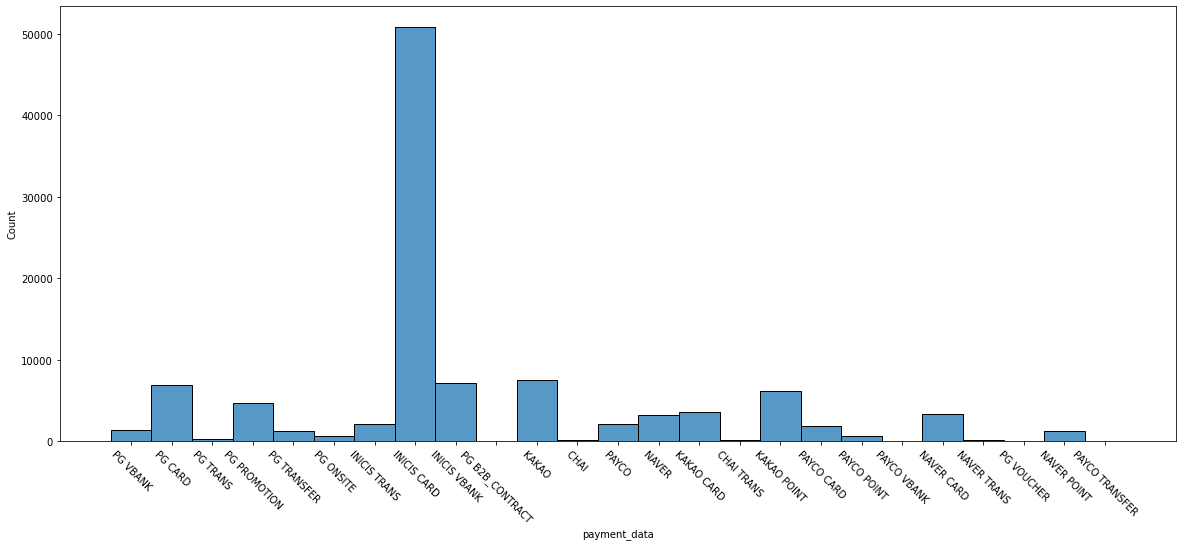

In [111]:
plt.figure(figsize=(20,8))
sns.histplot(data= payment_data,  x='payment_data')
plt.xticks(rotation=-45, fontsize=10)
plt.show()